<a href="https://colab.research.google.com/github/22f2001443/ideas_internship_notebook/blob/main/notebook_2_salePatterns/Visualizing_Time_Series_Dataset_Retail_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

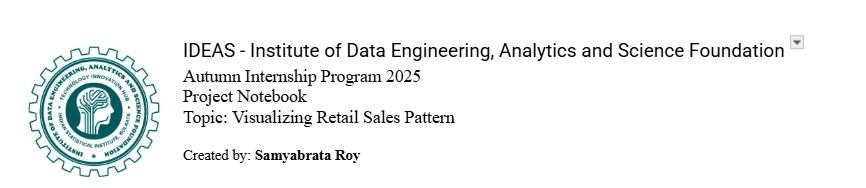

# Notebook: 2

👋 Welcome students!

In this journey, we’re going to take a dataset and slowly uncover the story it tells through visualization. Numbers by themselves can feel cold and endless, but once we turn them into visuals, they begin to speak.


---


# 📖 Introduction

Every time we walk into a store or shop online, we leave behind a trail of data — what we bought, when we bought it, how much we paid, and even how often we come back. At first glance, these transactions look like nothing more than rows in a spreadsheet: numbers, dates, and product codes.

But when we start to visualize this data, patterns emerge. We can see which products sell the most during festivals, how customer behavior changes across seasons, and which promotions actually drive sales. Suddenly, retail sales data isn’t just a collection of transactions — it’s a story about people, businesses, and the choices they make every day.

That’s the real power of visualization. It turns sales figures into insights that managers, marketers, and even students can understand at a glance. It’s not about making colorful charts — it’s about revealing trends, finding opportunities, and making smarter decisions.

In this notebook, we’ll take a retail sales dataset and learn how to explore and visualize it using Python. Some code will be provided, while other parts will be left for you to practice. By the end, you’ll see how visualization can transform raw sales data into meaningful insights — and how those insights help us understand the dynamics of retail businesses.


---





---

## 📝 Before We Dive In...

Before we start digging deep into the dataset, let’s pause for a moment and reflect.  
Here are a couple of questions for you to think about (and maybe discuss!):

1. **What do you understand by *Time-Series Data*?**  
   *(Hint: Think about data that is recorded over time — like daily sales data.)*

2. **Do you think choosing Python as our programming language for this analysis is a good decision?**  
   Feel free to share your honest opinion — there’s no right or wrong answer here!  

---

## ⚙️ Setting Things Up

Before we begin our analysis, we need to make sure we have the right tools.  
In the next coding cell, we’ll install and import the required Python packages that will help us explore and visualize the COVID-19 dataset.  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime

---

## 📂 Loading Our Dataset

Now that our setup is ready, it’s time to bring in the data we’ll be working with.  
In the next coding cell, we’ll load the COVID-19 dataset directly from **Google Drive** (shared with public view access).  

Once the file is loaded, we’ll **print the first few rows** so that we can get a quick look at what the dataset contains before moving into analysis and visualization.  



In [ ]:
# Replace with your Google Drive file ID which has public view access
file_id = "1kqDqFkMblqNBmt68clyn_CCNpdghgrE3"

# Construct the download URL
url = f"https://drive.google.com/uc?export=download&id={file_id}"

try:
  # Read CSV directly into pandas
  df_sales = pd.read_csv(url)

  # Show first few rows
  print(df_sales.head())
except Exception as e:
    print(f"Error loading data: {e}")

   Transaction ID        Date Customer ID Product Category  Quantity  \
0               1  2023-11-24     CUST001           Beauty         3   
1               2  2023-02-27     CUST002         Clothing         2   
2               3  2023-01-13     CUST003      Electronics         1   
3               4  2023-05-21     CUST004         Clothing         1   
4               5  2023-05-06     CUST005           Beauty         2   

   Price per Unit  Total Amount  
0              50         150.0  
1             500        1000.0  
2              30          30.0  
3             500         500.0  
4              50         100.0  


* To get more info about metadata of the dataset refer to README file in the root of this notebook directory



---


## EDA including visualization

### Plot 1:

Monthly Revenue Over Time  

Visualizing monthly revenue helps us understand sales trends across the year.  
Are there peaks during certain months (like festivals or holidays)? Let’s find out.

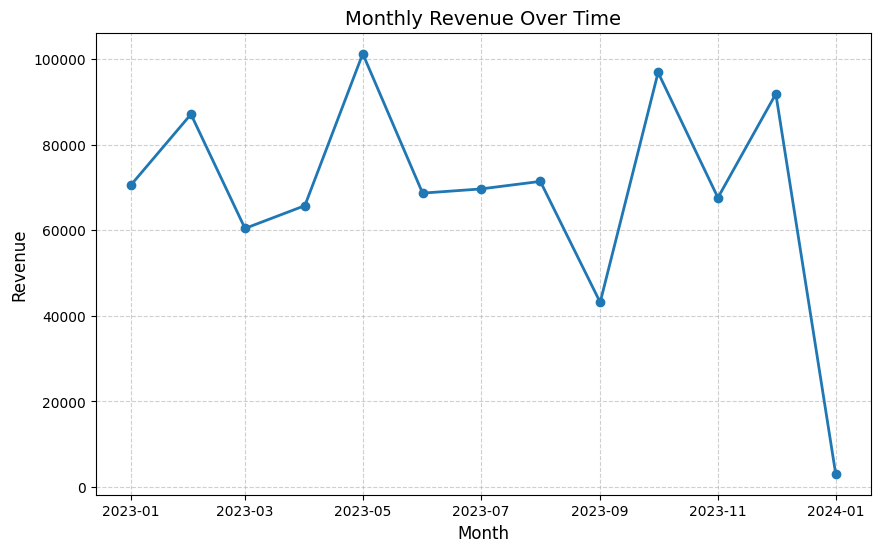

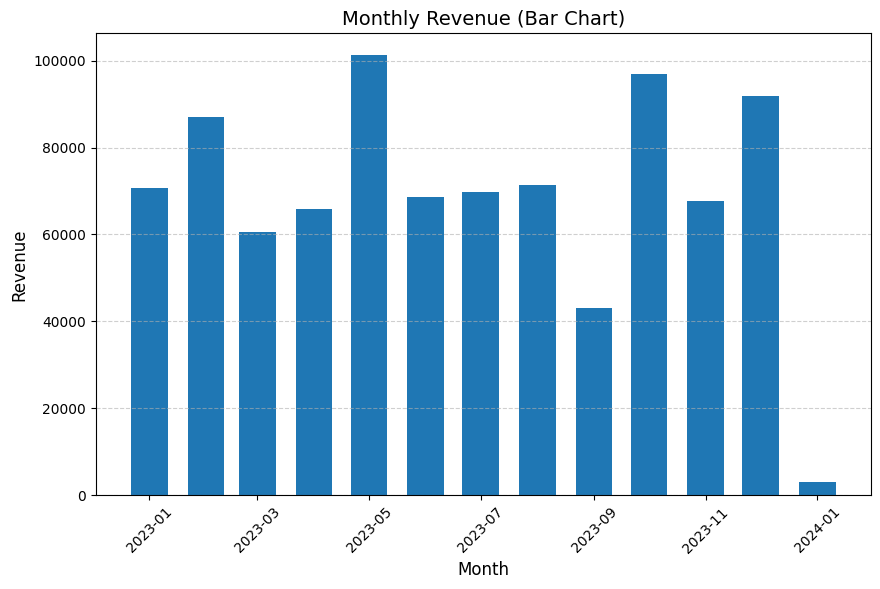

In [ ]:
# Ensure Date column is in datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'])

# Group by Month-Year and calculate total revenue
monthly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('M'))['Total Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

# ---- Line Chart ----
plt.figure(figsize=(10,6))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', linewidth=2)
plt.title("Monthly Revenue Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# ---- Bar Chart ----
plt.figure(figsize=(10,6))
plt.bar(monthly_revenue.index, monthly_revenue.values, width=20)  # width=20 for month spacing
plt.title("Monthly Revenue (Bar Chart)", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()


Q. Can you interpret the above bar diagram?

Q. What are your key takeaways?



---

###❓ Question:  

Plot the weekly revenue trend instead of monthly. What differences do you notice?


Please upload your retail sales CSV file...


Saving retail_sales_dataset.csv to retail_sales_dataset (1).csv

✅ Successfully loaded: retail_sales_dataset (1).csv

📄 Preview of the dataset:
   Transaction ID        Date Customer ID Product Category  Quantity  \
0               1  2023-11-24     CUST001           Beauty         3   
1               2  2023-02-27     CUST002         Clothing         2   
2               3  2023-01-13     CUST003      Electronics         1   
3               4  2023-05-21     CUST004         Clothing         1   
4               5  2023-05-06     CUST005           Beauty         2   

   Price per Unit  Total Amount  
0              50         150.0  
1             500        1000.0  
2              30          30.0  
3             500         500.0  
4              50         100.0  


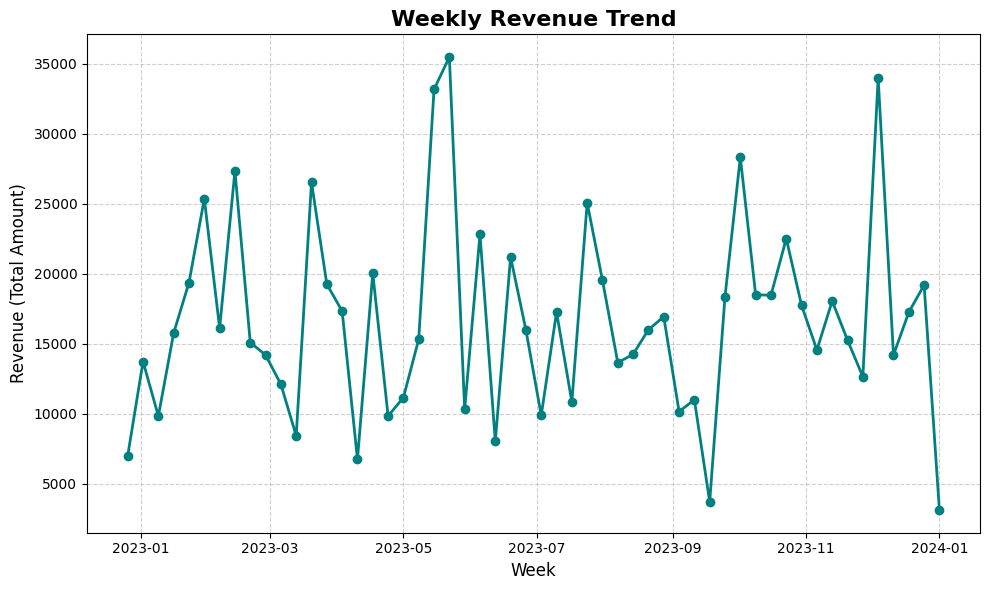


 Interpretation:
The weekly revenue trend shows finer details that monthly charts often miss.
You can observe:
- Short-term sales spikes (due to flash sales or promotions)
- Low-performing weeks (possibly due to fewer working days or low demand)
This helps businesses adjust marketing and operations week by week.



In [2]:


# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime
from google.colab import files  # for uploading CSV in Colab

# -------------------------------------------------------
#  Step 1: Upload CSV File
# -------------------------------------------------------
print("Please upload your retail sales CSV file...")
uploaded = files.upload()

# Automatically read the uploaded file
for file_name in uploaded.keys():
    df_sales = pd.read_csv(file_name)
    print(f"\n Successfully loaded: {file_name}")

# Display first few rows to verify
print("\n Preview of the dataset:")
print(df_sales.head())

# -------------------------------------------------------
#  Step 2: Data Cleaning and Preparation
# -------------------------------------------------------

# Convert 'Date' column to datetime format
df_sales['Date'] = pd.to_datetime(df_sales['Date'], errors='coerce')

# Remove any rows where 'Date' or 'Total Amount' is missing
df_sales = df_sales.dropna(subset=['Date', 'Total Amount'])

# Ensure Total Amount is numeric
df_sales['Total Amount'] = pd.to_numeric(df_sales['Total Amount'], errors='coerce')

# -------------------------------------------------------
#  Step 3: Weekly Revenue Calculation
# -------------------------------------------------------

# Group data by week and sum total revenue
weekly_revenue = df_sales.groupby(df_sales['Date'].dt.to_period('W'))['Total Amount'].sum()

# Convert PeriodIndex to Timestamp for plotting
weekly_revenue.index = weekly_revenue.index.to_timestamp()

# -------------------------------------------------------
#  Step 4: Visualization — Weekly Revenue Trend
# -------------------------------------------------------

plt.figure(figsize=(10,6))
plt.plot(weekly_revenue.index, weekly_revenue.values, marker='o', linewidth=2, color='teal')

plt.title("Weekly Revenue Trend", fontsize=16, weight='bold')
plt.xlabel("Week", fontsize=12)
plt.ylabel("Revenue (Total Amount)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
#  Step 5: Interpretation
# -------------------------------------------------------
print("""
 Interpretation:
The weekly revenue trend shows finer details that monthly charts often miss.
You can observe:
- Short-term sales spikes (due to flash sales or promotions)
- Low-performing weeks (possibly due to fewer working days or low demand)
This helps businesses adjust marketing and operations week by week.
""")




---


###Plot 2

Now well try to visualize the overall sales over all the product categories and infer about what product category is best selling.

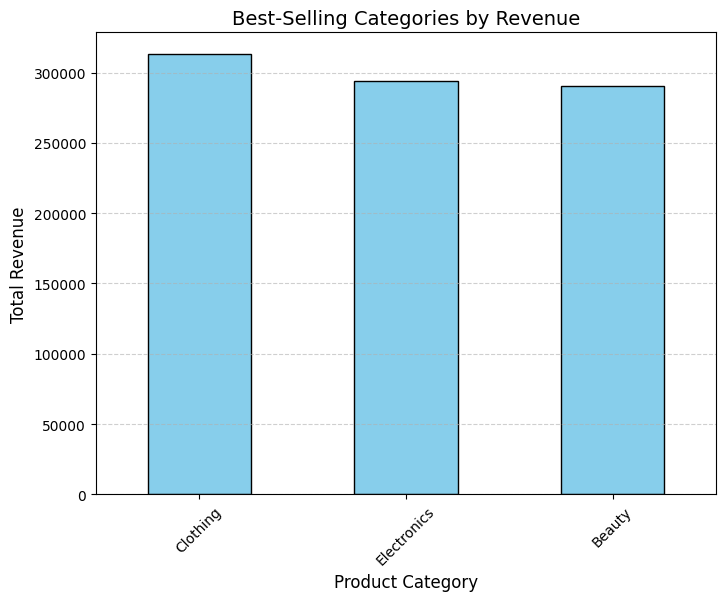

In [ ]:
# Group by Product Category and sum the revenue
category_revenue = df_sales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(8,6))
category_revenue.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Best-Selling Categories by Revenue", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.show()

Q. Now tell me which of the category has done the biggest contribution to the revenue?

 Please upload your CSV file (e.g., retail_sales.csv):


Saving retail_sales_dataset.csv to retail_sales_dataset (13).csv

 File 'retail_sales_dataset (13).csv' uploaded and loaded successfully!

 The category contributing the most to total revenue is: 'Clothing' with ₹312997.27



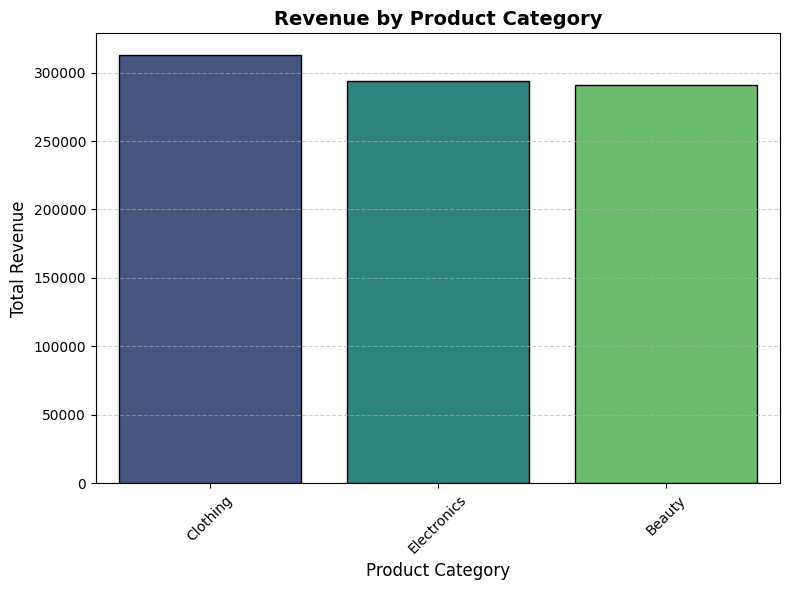

In [16]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime
from google.colab import files

#  Step 1: Upload and Load CSV File
print(" Please upload your CSV file (e.g., retail_sales.csv):")
uploaded = files.upload()

# Automatically get uploaded file name
file_name = list(uploaded.keys())[0]
df_sales = pd.read_csv(file_name)
print(f"\n File '{file_name}' uploaded and loaded successfully!\n")

#  Step 2: Basic Data Cleaning
df_sales['Date'] = pd.to_datetime(df_sales['Date'], errors='coerce')
df_sales = df_sales.dropna(subset=['Product Category', 'Total Amount'])

#  Step 3: Compute Total Revenue by Product Category
category_revenue = (
    df_sales.groupby('Product Category')['Total Amount']
    .sum()
    .sort_values(ascending=False)
)

#  Step 4: Identify Top Category
top_category = category_revenue.idxmax()
top_revenue = category_revenue.max()
print(f" The category contributing the most to total revenue is: '{top_category}' with ₹{top_revenue:.2f}\n")

#  Step 5: Visualize with a Bar Chart
plt.figure(figsize=(8,6))
sns.barplot(
    x=category_revenue.index,
    y=category_revenue.values,
    hue=category_revenue.index,
    dodge=False,
    legend=False,
    palette='viridis',
    edgecolor='black'
)
plt.title("Revenue by Product Category", fontsize=14, weight='bold')
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()





---


###❓ Question:  
What if we want to visualize the **top 5 customers** by total spending?  
Try writing the code to generate a bar chart!  

 Please upload your CSV file (e.g., retail_sales.csv):


Saving retail_sales_dataset.csv to retail_sales_dataset (6).csv

 File 'retail_sales_dataset (6).csv' uploaded successfully!

 Top 5 Customers by Total Spending:
Customer ID
CUST281    3438.4955
CUST356    3435.4024
CUST487    3412.1635
CUST421    3382.2595
CUST636    3352.6203
Name: Total Amount, dtype: float64 



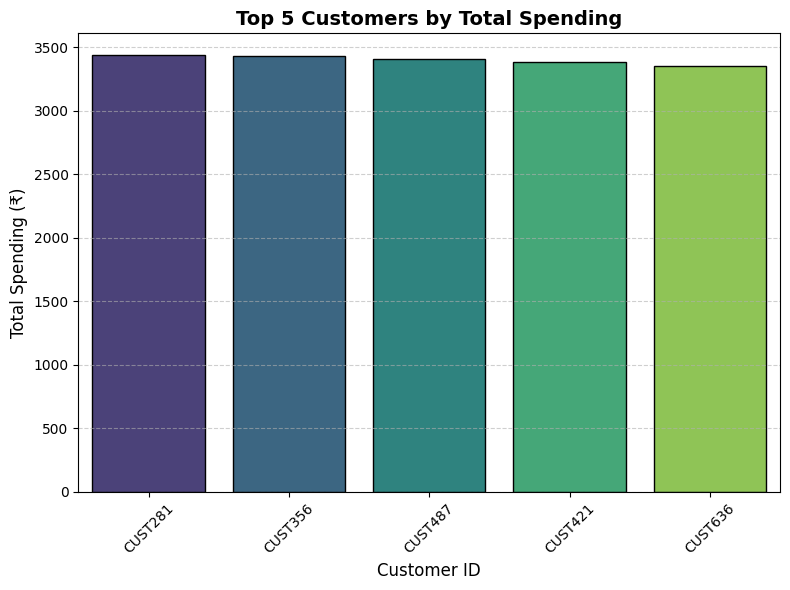

In [8]:

#  Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime
from google.colab import files

# ---------------------------------------------
#  Step 1: Upload and Load Dataset
# ---------------------------------------------
print(" Please upload your CSV file (e.g., retail_sales.csv):")
uploaded = files.upload()

# Automatically read uploaded file
file_name = list(uploaded.keys())[0]
df_sales = pd.read_csv(file_name)
print(f"\n File '{file_name}' uploaded successfully!\n")

# ---------------------------------------------
#  Step 2: Basic Preprocessing
# ---------------------------------------------
df_sales['Date'] = pd.to_datetime(df_sales['Date'], errors='coerce')
df_sales = df_sales.dropna(subset=['Customer ID', 'Total Amount'])

# ---------------------------------------------
#  Step 3: Find Top 5 Customers by Total Spending
# ---------------------------------------------
top_customers = (
    df_sales.groupby('Customer ID')['Total Amount']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

print(" Top 5 Customers by Total Spending:")
print(top_customers, "\n")

# ---------------------------------------------
#  Step 4: Visualize with Seaborn Bar Chart
# ---------------------------------------------
plt.figure(figsize=(8,6))
sns.barplot(
    x=top_customers.index,
    y=top_customers.values,
    hue=top_customers.index,  #
    dodge=False,
    legend=False,
    palette="viridis",
    edgecolor="black"
)
plt.title("Top 5 Customers by Total Spending", fontsize=14, weight='bold')
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Total Spending (₹)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()





---



Calculate the average order value (AOV) per customer and plot them with a suitable diagram. Which customers have unusually high AOVs?

 Please upload your CSV file (e.g., retail_sales.csv):


Saving retail_sales_dataset.csv to retail_sales_dataset (9).csv

 File 'retail_sales_dataset (9).csv' uploaded successfully!

 Average Order Value (AOV) per Customer:
Customer ID
CUST281    1719.24775
CUST356    1717.70120
CUST487    1706.08175
CUST421    1691.12975
CUST636    1676.31015
Name: Total Amount, dtype: float64 

 Customers with unusually high AOVs (above ₹1170.75):

Customer ID
CUST281    1719.24775
CUST356    1717.70120
CUST487    1706.08175
CUST421    1691.12975
CUST636    1676.31015
CUST805    1647.12850
CUST269    1622.44045
CUST202    1584.36610
CUST743    1580.52465
CUST142    1562.38335
CUST757    1542.49790
CUST072    1516.63695
CUST031    1508.42285
CUST684    1494.10065
CUST683    1477.30540
CUST117    1475.65305
CUST561    1462.21770
CUST447    1441.86160
CUST015    1438.68355
CUST054    1414.01615
CUST968    1363.17595
CUST067    1338.25960
CUST239    1335.00860
CUST013    1324.03390
CUST720    1310.03540
CUST233    1299.77255
CUST074    1289.05580
CUST524    12

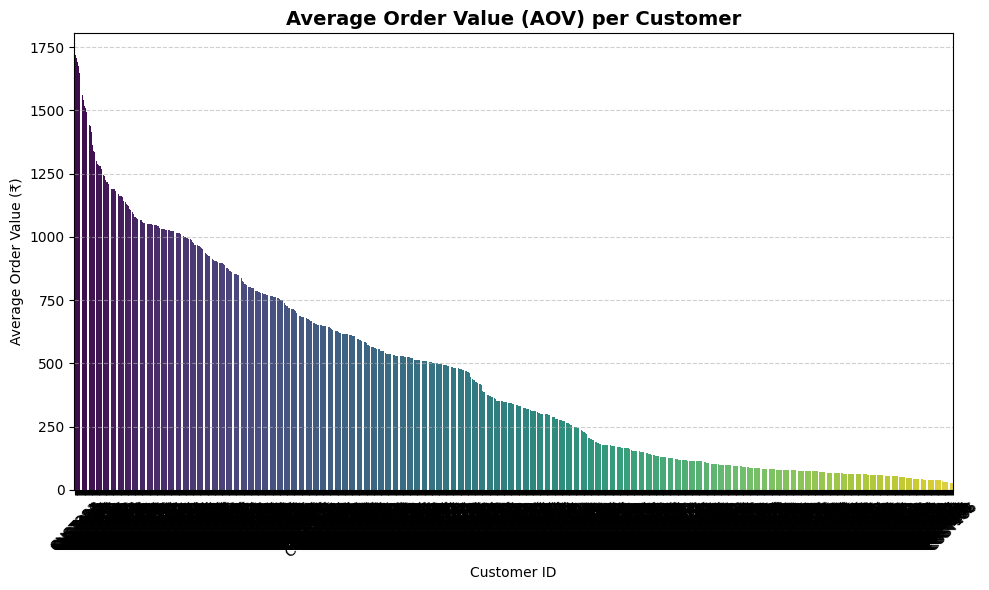

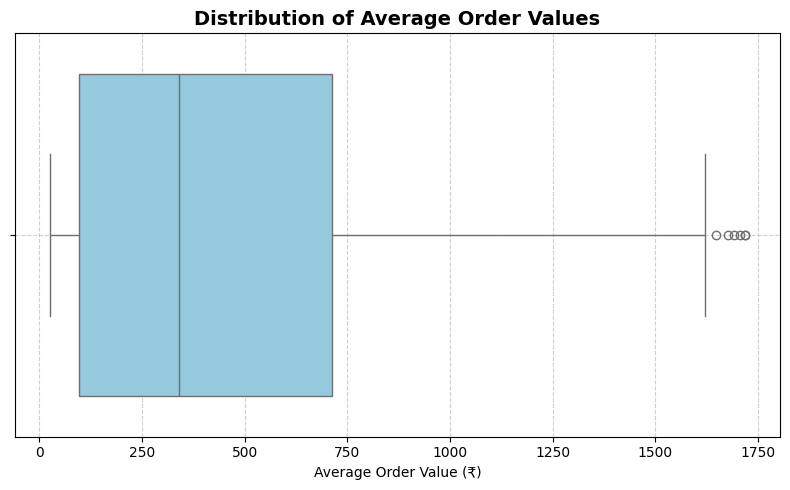

In [11]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime
from google.colab import files
# ---------------------------------------------
#  Step 1: Upload and Load Dataset
# ---------------------------------------------
print(" Please upload your CSV file (e.g., retail_sales.csv):")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load dataset
df_sales = pd.read_csv(file_name)
print(f"\n File '{file_name}' uploaded successfully!\n")

# ---------------------------------------------
#  Step 2: Basic Cleaning
# ---------------------------------------------
df_sales['Date'] = pd.to_datetime(df_sales['Date'], errors='coerce')
df_sales = df_sales.dropna(subset=['Customer ID', 'Total Amount'])

# ---------------------------------------------
#  Step 3: Calculate Average Order Value (AOV)
# ---------------------------------------------
aov_per_customer = (
    df_sales.groupby('Customer ID')['Total Amount']
    .mean()
    .sort_values(ascending=False)
)

print(" Average Order Value (AOV) per Customer:")
print(aov_per_customer.head(), "\n")

# Identify unusually high AOVs (top 5%)
threshold = aov_per_customer.quantile(0.95)
high_aov_customers = aov_per_customer[aov_per_customer > threshold]
print(f" Customers with unusually high AOVs (above ₹{threshold:.2f}):\n")
print(high_aov_customers, "\n")

# ---------------------------------------------
#  Step 4: Visualizations
# ---------------------------------------------


plt.figure(figsize=(10,6))
sns.barplot(
    x=aov_per_customer.index,
    y=aov_per_customer.values,
    hue=aov_per_customer.index,  #
    palette="viridis",
    legend=False
)
plt.title("Average Order Value (AOV) per Customer", fontsize=14, weight='bold')
plt.xlabel("Customer ID")
plt.ylabel("Average Order Value (₹)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- Box Plot to Identify Outliers ---
plt.figure(figsize=(8,5))
sns.boxplot(x=aov_per_customer.values, color="skyblue")
plt.title("Distribution of Average Order Values", fontsize=14, weight='bold')
plt.xlabel("Average Order Value (₹)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()





---


###Plot 3


After inspecting the contribution of each categories towards the total revenue we can say which categot=ry has contributed how much but it's necessary to get a relative quantification to compare between the categories' contribution.

So, we'll now see a donut chart of revenue contributions by each category

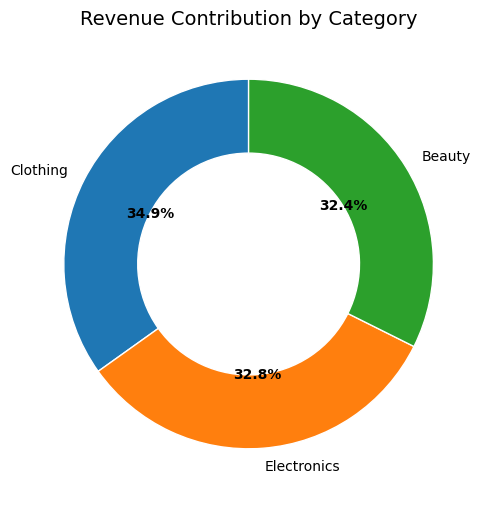

In [ ]:
# Donut chart
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
    category_revenue,
    labels=category_revenue.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Formatting
plt.setp(autotexts, size=10, weight="bold", color="black")
plt.title("Revenue Contribution by Category", fontsize=14)
plt.show()

Q. Was chosing donut chart a wise choice according to you?

Q. What else we could have come up with apart from donut chart to server the same purpose?



---

##Task:
Plot a cumulative revenue line chart. How does this help in understanding long-term sales growth?

 Please upload your CSV file (e.g., retail_sales.csv):


Saving retail_sales_dataset.csv to retail_sales_dataset (11).csv

 File 'retail_sales_dataset (11).csv' uploaded successfully!

 First few cumulative revenue values:
           Date  Total Amount  Cumulative Revenue
558  2023-01-01     1200.0000           1200.0000
1355 2023-01-01      918.8309           2118.8309
1899 2023-01-01     1400.6737           3519.5046
1704 2023-01-01     1081.3073           4600.8119
521  2023-01-01     1500.0000           6100.8119 



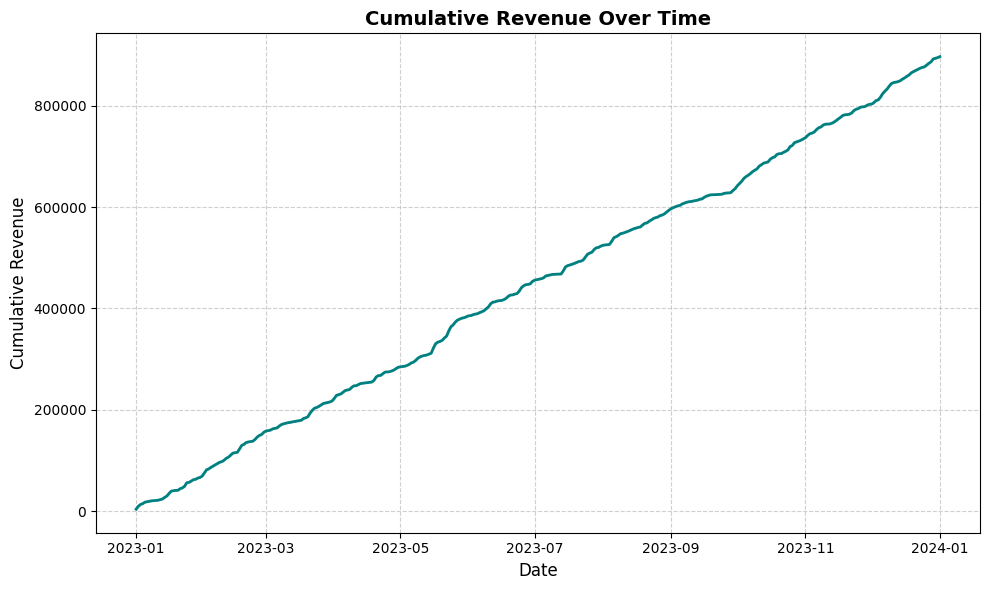

 Interpretation:
This chart shows how total revenue accumulates over time.
A steadily rising curve indicates consistent growth,
while flat sections reveal stagnant sales periods or slow performance.
It helps businesses visualize long-term performance and identify growth trends.



In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from datetime import datetime
from google.colab import files
import warnings


# ---- Step 1: Upload CSV File ----
print(" Please upload your CSV file (e.g., retail_sales.csv):")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load dataset
df_sales = pd.read_csv(file_name)
print(f"\n File '{file_name}' uploaded successfully!\n")

# ---- Step 2: Basic Data Cleaning ----
df_sales['Date'] = pd.to_datetime(df_sales['Date'], errors='coerce')
df_sales = df_sales.dropna(subset=['Date', 'Total Amount'])
df_sales = df_sales.sort_values('Date')

# ---- Step 3: Calculate Cumulative Revenue ----
df_sales['Cumulative Revenue'] = df_sales['Total Amount'].cumsum()

# ---- Step 4: Display Key Info ----
print(" First few cumulative revenue values:")
print(df_sales[['Date', 'Total Amount', 'Cumulative Revenue']].head(), "\n")

# ---- Step 5: Plot Cumulative Revenue Line Chart ----
plt.figure(figsize=(10,6))
sns.lineplot(data=df_sales, x='Date', y='Cumulative Revenue', color='teal', linewidth=2, legend=False)
plt.title("Cumulative Revenue Over Time", fontsize=14, weight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Revenue", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


# ---- Step 7: Interpretation ----
print(" Interpretation:")
print("This chart shows how total revenue accumulates over time.")
print("A steadily rising curve indicates consistent growth,")
print("while flat sections reveal stagnant sales periods or slow performance.")
print("It helps businesses visualize long-term performance and identify growth trends.\n")




---
# Assisgnment

### Find a similar dataset of your choice and perform detailed EDA with proper visualization and infer about the dataset.
